# Oct ??th, 2022 ()

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from copy import deepcopy as dc
from os.path import join as pjoin
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-MTMST/_extras')
fig_base_dir = pjoin(git_dir, 'jb-MTMST/figs')
tmp_dir = pjoin(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_MTMST'))
from model.vae import ConfigVAE, VAE
from utils.plotting import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
from torch import nn

In [3]:
from model.common import Chomp

In [5]:
rot_kernel_size = [3] * 3
padding = tuple(k - 1 for k in rot_kernel_size)
padding

(2, 2, 2)

In [6]:
ch = Chomp(padding, 3)

In [11]:
x = torch.randn(10, 2, 12, 15, 15)
y = ch(x)

In [13]:
x.shape

torch.Size([10, 2, 12, 15, 15])

In [14]:
y.shape

torch.Size([10, 2, 10, 13, 13])

In [15]:
x.is_contiguous()

True

In [16]:
y.is_contiguous()

True

In [17]:
_dir = '/home/hadi/Documents/MTMST/MT_LFP/pytorch_processed'

In [19]:
x = joblib.load(pjoin(_dir, 'nardin.sav'))
list(x)

['stim', 'spks', 'filters', 'train_indxs', 'valid_indxs', 'cell_ids']

In [20]:
x['stim'].shape

(2, 15, 15, 14400)

In [21]:
y = x['stim'].reshape(-1, x['stim'].shape[-1])
y.shape

(450, 14400)

In [24]:
y1, y2, y3 = np.split(y, 3, -1)
y1.shape, y2.shape, y3.shape

((450, 4800), (450, 4800), (450, 4800))

In [26]:
sp_dist.euclidean(y1[0], y3[0])

73.12644958496094

In [28]:
v = np.linalg.norm(x['stim'], ord=2, axis=0)
v.shape

(15, 15, 14400)

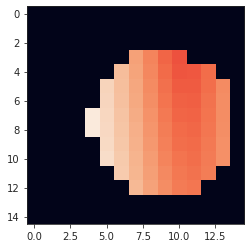

In [67]:
plt.imshow(v[..., 7210])

In [75]:
i = 7210

error = np_nans(x['stim'].shape[-1])
for j in tqdm(range(len(error))):
    e = x['stim'][..., j] - x['stim'][..., i]
    e = np.linalg.norm(e.ravel(), ord=2).sum()
    error[j] = e

  0%|          | 0/14400 [00:00<?, ?it/s]

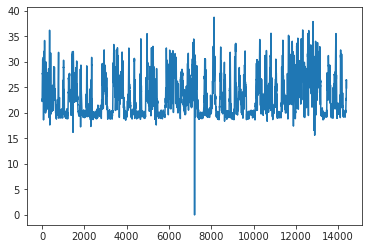

In [76]:
plt.plot(error)

In [79]:
np.argsort(error)[:10]

array([ 7210,  7211,  7209,  7212,  7208,  7207,  7213,  7206, 12893,
       12894])

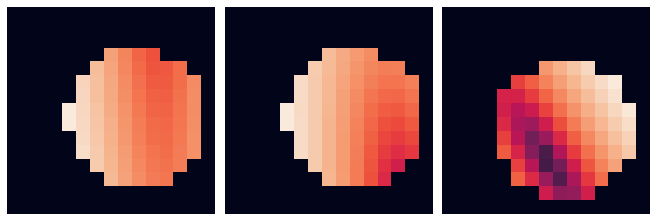

In [89]:
fig, axes = create_figure(1, 3, (9, 3), constrained_layout=True)
axes[0].imshow(v[..., 7210])
axes[1].imshow(v[..., 7211])
axes[2].imshow(v[..., 12894])
remove_ticks(axes)

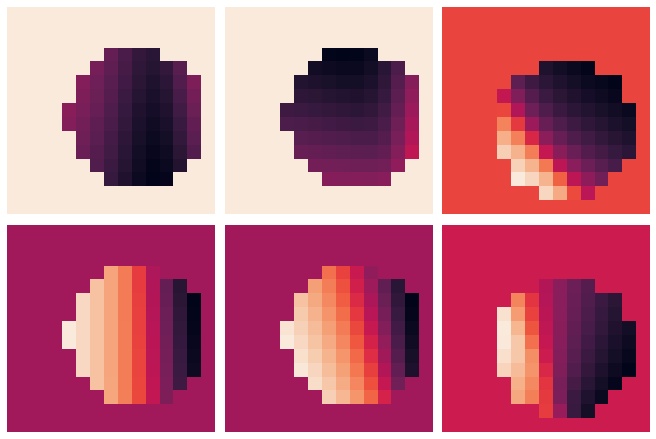

In [91]:
fig, axes = create_figure(2, 3, (9, 6), constrained_layout=True)
axes[0, 0].imshow(x['stim'][0, ..., 7210])
axes[1, 0].imshow(x['stim'][1, ..., 7210])

axes[0, 1].imshow(x['stim'][0, ..., 7211])
axes[1, 1].imshow(x['stim'][1, ..., 7211])

axes[0, 2].imshow(x['stim'][0, ..., 12894])
axes[1, 2].imshow(x['stim'][1, ..., 12894])

remove_ticks(axes)

In [3]:
m = nn.Linear(5, 20, 3)
m.__class__.__name__

'Linear'

In [4]:
m = nn.ConvTranspose3d(20, 5, 3)
m.__class__.__name__

'ConvTranspose3d'

In [5]:
'Conv' in m.__class__.__name__

True

In [6]:
from model.configuration import ConfigVAE

cfg = ConfigVAE()
print(cfg.get_name())

z-8x2_k-8x8_norm-batch-spectral

In [7]:
vae = VAE(cfg)
vae.datetime

'2022_10_05,18:44'

In [8]:
from model.common import save_model, load_model

In [9]:
_ = save_model(vae, 56)

In [10]:
model, meta = load_model(
    name='z-8x2_k-8x8_norm-batch-spectral',
    time=-1,
    chkpt=-1,
    strict=True,
    verbose=True,
)

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|     VAE     |    512     |
|     ---     |    ---     |
|     enc     |    512     |
+-------------+------------+

In [11]:
meta

{'fname': 'VAE-0056-(2022_10_05,18:44).bin',
 'chkpt': -1,
 'dir': '/home/hadi/Documents/MTMST/models/z-8x2_k-8x8_norm-batch-spectral/save/2022_10_05,18:44'}

In [12]:
from torch.utils import tensorboard
tensorboard.SummaryWriter()

In [13]:
vae.enc

SELayer(
  (avg_pool): AdaptiveAvgPool3d(output_size=1)
  (fc): Sequential(
    (0): Linear(in_features=64, out_features=4, bias=False)
    (1): SiLU()
    (2): Linear(in_features=4, out_features=64, bias=False)
    (3): Sigmoid()
  )
)

In [20]:
next(vae.parameters()).device

device(type='cpu')

In [21]:
from torch import nn

In [40]:
norm = nn.LayerNorm(5)

In [41]:
norm

LayerNorm((5,), eps=1e-05, elementwise_affine=True)

In [42]:
isinstance(norm, nn.BatchNorm3d)

False

In [43]:
'Norm' in norm.__class__.__name__

True

In [45]:
m = 2
if hasattr(m, 'bias') and m.bias is not None:
    print(hi)

In [25]:
type(norm)

type

In [28]:
nn.BatchNorm3d

torch.nn.modules.batchnorm.BatchNorm3d

In [30]:
str(norm)

"<class 'torch.nn.modules.batchnorm.BatchNorm3d'>"

In [32]:
norm.__class__.

type

In [23]:
type(norm).__name__

'type'

In [7]:
display(HTML(fonts_html()))